Import libraries

In [116]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt

Load files

In [117]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0],  squeeze=True, date_parser=parser) #index_col=0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [118]:
series

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


In [119]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


Check for null values

In [120]:
series.isnull().sum()

Month    0
Sales    0
dtype: int64

Chart

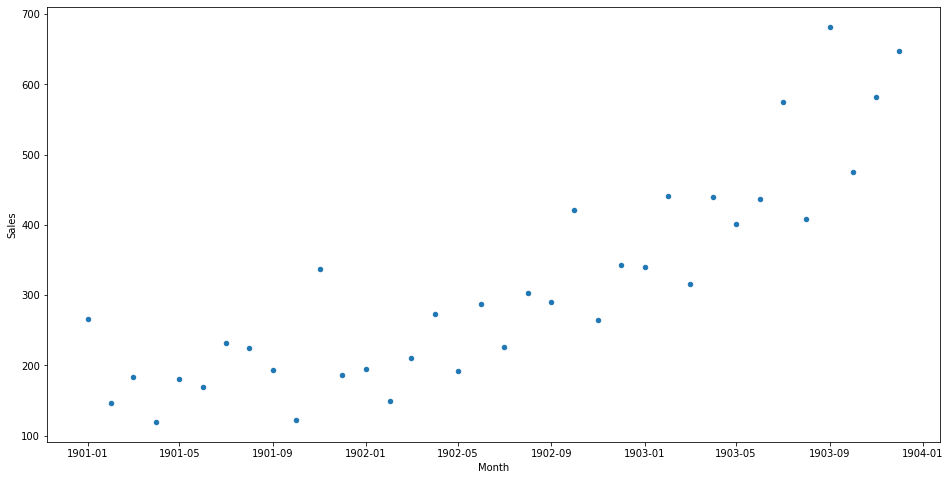

In [121]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 1, sharey=True)
series.plot(kind='scatter', x='Month', y='Sales', ax=axs, figsize=(16, 8))

Define training and validation dates

In [122]:
series.Month = series.Month.astype(str)
series.index = series.Month
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [123]:
series['Timestamp'] = pd.to_datetime(series.Month,format='%Y-%m') 
series.index = series.Timestamp 
# Converting to monthly mean 
monthly = series.resample('M').mean()
series

,Month,Sales,Timestamp
Timestamp,,,
1901-01-01,1901-01-01,266.0,1901-01-01
1901-02-01,1901-02-01,145.9,1901-02-01
1901-03-01,1901-03-01,183.1,1901-03-01
1901-04-01,1901-04-01,119.3,1901-04-01
1901-05-01,1901-05-01,180.3,1901-05-01
1901-06-01,1901-06-01,168.5,1901-06-01
1901-07-01,1901-07-01,231.8,1901-07-01
1901-08-01,1901-08-01,224.5,1901-08-01
1901-09-01,1901-09-01,192.8,1901-09-01


In [124]:
train=series.loc['1901-01-01':'1903-07-30'] 
valid=series.loc['1903-08-01':'1903-12-31']

In [125]:
train

,Month,Sales,Timestamp
Timestamp,,,
1901-01-01,1901-01-01,266.0,1901-01-01
1901-02-01,1901-02-01,145.9,1901-02-01
1901-03-01,1901-03-01,183.1,1901-03-01
1901-04-01,1901-04-01,119.3,1901-04-01
1901-05-01,1901-05-01,180.3,1901-05-01
1901-06-01,1901-06-01,168.5,1901-06-01
1901-07-01,1901-07-01,231.8,1901-07-01
1901-08-01,1901-08-01,224.5,1901-08-01
1901-09-01,1901-09-01,192.8,1901-09-01


In [126]:
valid

,Month,Sales,Timestamp
Timestamp,,,
1903-08-01,1903-08-01,407.6,1903-08-01
1903-09-01,1903-09-01,682.0,1903-09-01
1903-10-01,1903-10-01,475.3,1903-10-01
1903-11-01,1903-11-01,581.3,1903-11-01
1903-12-01,1903-12-01,646.9,1903-12-01


Graphics

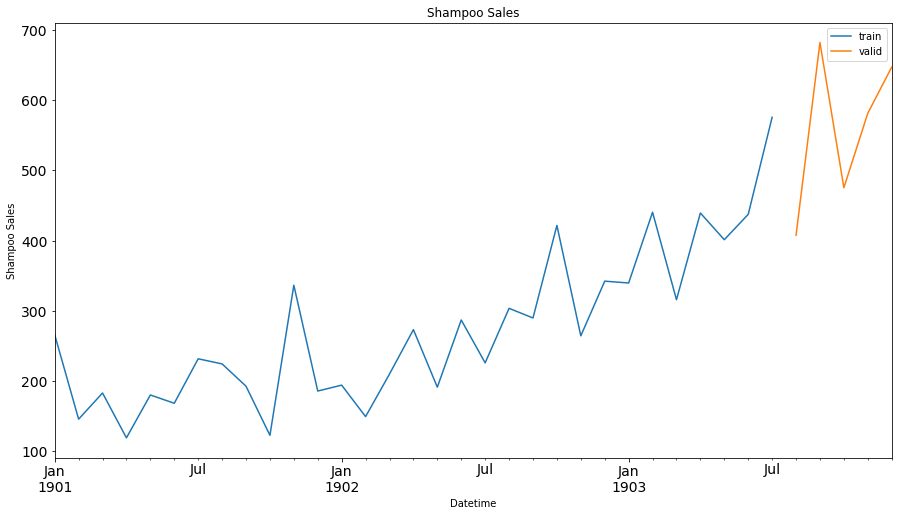

In [127]:
train['Sales'].plot(figsize=(15,8), title= 'Shampoo Sales', fontsize=14, label='train') 
valid['Sales'].plot(figsize=(15,8), title= 'Shampoo Sales', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Shampoo Sales") 
plt.legend(loc='best') 
plt.show()

Rename columns

In [128]:
import datetime
from datetime import datetime

train = train.rename(columns={'Month': 'ds','Sales': 'y'})
train

,ds,y,Timestamp
Timestamp,,,
1901-01-01,1901-01-01,266.0,1901-01-01
1901-02-01,1901-02-01,145.9,1901-02-01
1901-03-01,1901-03-01,183.1,1901-03-01
1901-04-01,1901-04-01,119.3,1901-04-01
1901-05-01,1901-05-01,180.3,1901-05-01
1901-06-01,1901-06-01,168.5,1901-06-01
1901-07-01,1901-07-01,231.8,1901-07-01
1901-08-01,1901-08-01,224.5,1901-08-01
1901-09-01,1901-09-01,192.8,1901-09-01


In [129]:

valid = valid.rename(columns={'Month': 'ds','Sales': 'y'})
valid

,ds,y,Timestamp
Timestamp,,,
1903-08-01,1903-08-01,407.6,1903-08-01
1903-09-01,1903-09-01,682.0,1903-09-01
1903-10-01,1903-10-01,475.3,1903-10-01
1903-11-01,1903-11-01,581.3,1903-11-01
1903-12-01,1903-12-01,646.9,1903-12-01


FB Prophet

In [130]:
from fbprophet import Prophet

model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


Make predictions

In [131]:
# Python
future = model.make_future_dataframe(periods=5, freq='MS')
future

,ds
0,1901-01-01
1,1901-02-01
2,1901-03-01
3,1901-04-01
4,1901-05-01
5,1901-06-01
6,1901-07-01
7,1901-08-01
8,1901-09-01
9,1901-10-01


In [132]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
31,1903-08-01,319.621062,268.883109,375.177956
32,1903-09-01,354.565928,304.606030,404.355411
33,1903-10-01,719.156895,666.711708,773.379135
34,1903-11-01,242.199469,185.163227,297.193112
35,1903-12-01,572.155664,515.250219,621.565154


In [133]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid.y, forecast.yhat.iloc[-5:])
print(rms)

58999.08721085847


In [134]:
df_val=pd.DataFrame({'actual': valid.y, 'predicted': forecast.yhat.iloc[-5:].values})
df_val

,actual,predicted
Timestamp,,
1903-08-01,407.6,319.621062
1903-09-01,682.0,354.565928
1903-10-01,475.3,719.156895
1903-11-01,581.3,242.199469
1903-12-01,646.9,572.155664


Plot forecast

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


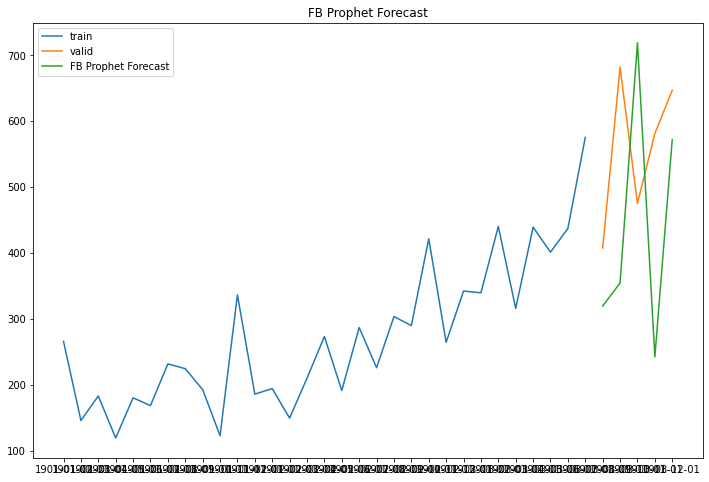

In [135]:
plt.figure(figsize=(12,8)) 
plt.plot(train.ds, train.y, label='train') 
plt.plot(valid.ds,valid.y, label='valid') 
plt.plot(forecast.yhat.iloc[-5:], label='FB Prophet Forecast') 
plt.legend(loc='best') 
plt.title("FB Prophet Forecast") 
plt.show()